# K-means Clustering Algorithm

You will implement the K-means unsupervised learning algorithm.

Use the simplified Iris dataset provided to test your code.

Column 1: sepal length.
Column 2: sepal width

50 samples for setosa, 50 samples for versicolor

   


(100, 2)


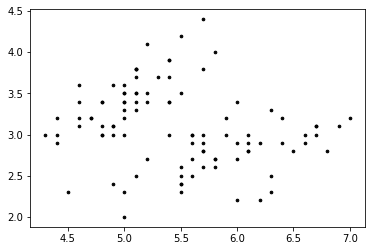

In [42]:
# Load dataset and plot it

%matplotlib inline
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt

df = pd.read_csv('/simple_iris_dataset.csv')

df1 = df['sepal_length'].values
df2 = df['sepal_width'].values
X = np.array(list(zip(df1, df2)))   # 100 x 2
plt.scatter(df1, df2, c='black', s=7)
print(X.shape)

In [44]:
## Your code goes here ...

def nearest_cluster_index(x, centroids):
  ## x is data point passed as list
  ## centroid: list of centroids Nx2
  cluster_index = 0
  min_distance = abs(centroids[0][0] - x[0])  + abs(centroids[0][1] - x[1])
  for i in range(1, len(centroids)):
    cur_distance = abs(centroids[i][0] - x[0])  + abs(centroids[i][1] - x[1])
    if cur_distance < min_distance:
      min_distance = cur_distance
      cluster_index = i
  return cluster_index

def compute_centroids(X, clusters):
  ## x is a list of data point - Nx2
  ## clusters: list representing cluster index of each data point
  num_clusters = len(np.unique(clusters))
  centroids = np.zeros((num_clusters,2))
  count_dp_cluster = [0]*num_clusters

  for i in range(0, len(X)):
    count_dp_cluster[clusters[i]] = 1 + count_dp_cluster[clusters[i]]
    centroids[clusters[i]][0] = centroids[clusters[i]][0] + X[i][0]
    centroids[clusters[i]][1] = centroids[clusters[i]][1] + X[i][1]

  for i in range(0, num_clusters):
    centroids[i][0] = centroids[i][0]/count_dp_cluster[i]
    centroids[i][1] = centroids[i][1]/count_dp_cluster[i]
  #print(centroids)
  return centroids

clusters = [None]*len(X)
centroids = np.array([[5.0, 3.5],
            [6.0, 2.5]])

## to stop recomputing centroids
stop_flag = False
while True:
  if stop_flag == True:
    break       
  stop_flag = True
  for i in range(0, len(X)):
    ci = nearest_cluster_index(np.array(X[i], dtype=np.float32), centroids)
    if ci != clusters[i]:
      ## data point is assigned to different cluster. so, we have to recompute centroids
      stop_flag = False
      clusters[i] = ci    
  centroids = compute_centroids(X, clusters)

g
r


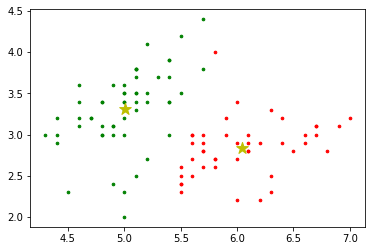

In [45]:
def plot_clusters(X, clusters, centroids):
    """
      X : unlabeled data set, dimension=Nx2.
      clusters: N-dimensional vector indicating the cluster assignment 
        of each data point in X.
              [0, 1, 1, ...]
      centroids: 2x2 matrix, the row contains the coordinates of the centroids.
        [[centroid 1 - 1x2 vector]   
         [centroid 2 - 1x2 vector]]   

    """
    colors = ['g', 'r', 'b', 'y', 'c', 'm']
    k,_ = np.shape(centroids)

    fig, ax = plt.subplots()
    for i in range(k):
        print(colors[i])
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

    plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=150, c='y')
    
plot_clusters(X,clusters, centroids)